In [21]:
import numpy as np
import pickle
# test = np.frombuffer(data, dtype = "float32")
import matplotlib.pyplot as plt
import gpu_tracking
import tifffile
import pandas as pd
import trackpy as tp
arr = tifffile.imread("../emily_tracking/sample_vids/s_20.tif", key = 0).astype("float32")[None, ...]
coords = lambda df: df[["y", "x"]].to_numpy().T
from scipy.spatial import KDTree
with open("mine_processed", "rb") as file:
    data = file.read()
processed = np.frombuffer(data, dtype = "float32").reshape(2, 512, 512)[0]
with open("test", "rb") as file:
    data = file.read()
centers = np.frombuffer(data, dtype = "float32").reshape(2, 512, 512)
with open("tp_processed.pkl", "rb") as file:
    tp_processed = pickle.load(file).astype("float32")
with open("inp", "rb") as file:
    data = file.read()
frame = np.frombuffer(data, dtype = "float32").reshape(512, 512)
from scipy.ndimage import grey_dilation
import scipy.fft as fft

In [2]:
int(2*11 / np.sqrt(2))

15

In [2]:
idk = grey_dilation(processed, int(2*11 / np.sqrt(2))) == processed

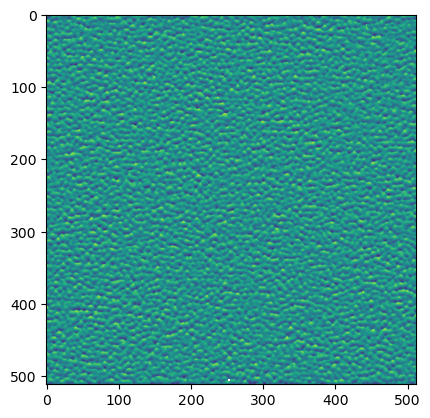

In [ ]:
plt.imshow(centers[:, :, 0])

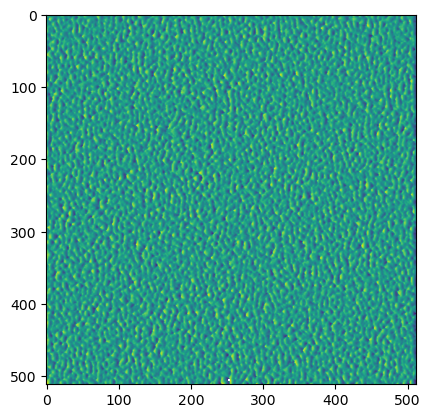

In [ ]:
plt.imshow(centers[:, :, 1])

In [7]:
tp_processed[10:-10, 10:-10]

array([[ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.7598985, ..., 34.85846  ,  0.       ,
         0.       ],
       [17.612722 , 29.98375  , 28.871027 , ..., 37.318943 ,  0.       ,
         0.       ],
       ...,
       [ 8.324141 ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [18.976637 , 17.053104 , 12.702484 , ...,  0.       ,  0.       ,
         0.       ],
       [16.273813 , 36.807068 , 44.924137 , ...,  0.       ,  0.       ,
        12.757451 ]], dtype=float32)

In [ ]:
from scipy.signal import convolve
import scipy.signal as sgn

In [10]:
# with open("trackpy_reference/locations.pkl", "rb") as file:
#     tp_df = pickle.load(file)
diameter = 9
minmass = 1000
separation = 10
my_df = pd.DataFrame(gpu_tracking.batch(arr[0:1], diameter, minmass = minmass, separation = separation), columns = ["frame", "mass", "y", "x"])
my_df = my_df.astype({"frame": int})[["frame", "y", "x", "mass"]]

tp_df = tp.locate(arr[0], diameter, threshold = 0, percentile = 95, minmass = minmass, characterize = False, separation = separation)

my_tree = KDTree(coords(my_df).T)
tp_tree = KDTree(coords(tp_df).T)
dists, inds = my_tree.query(coords(tp_df).T, distance_upper_bound = 0.01)

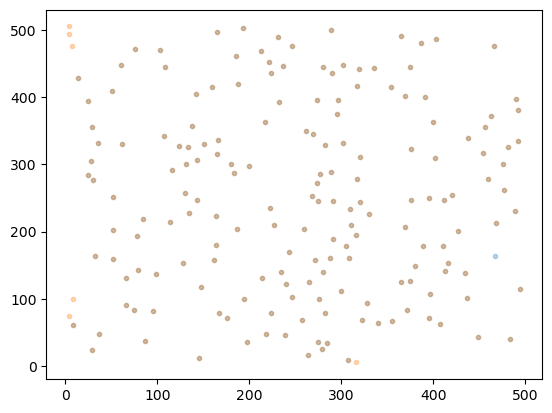

In [11]:
plt.plot(*coords(my_df), "C0.", alpha = 0.3)
plt.plot(*coords(tp_df), "C1.", alpha = 0.3)
# plt.plot(*next(it)[1].T, "C2.", alpha = 0.3)
# plt.plot(*coords(tp_df).T[dists == np.inf][26].T, "C2.", alpha = 0.3)

In [9]:
my_df

,frame,y,x,mass
0,0,0.692848,5.101413,681.680115
1,0,0.160265,44.730972,237.460739
2,0,0.091719,64.236740,241.772690
3,0,0.782303,141.644379,373.814941
4,0,0.094763,226.737488,329.335266
...,...,...,...,...
1146,0,510.867035,294.876526,311.454376
1147,0,510.644073,358.306641,409.800598
1148,0,509.481384,394.170929,491.380066
1149,0,511.000000,488.402313,161.340500


In [19]:
tp.masks.gaussian_kernel(1, 4)[:, None]

array([[-0.99986617],
       [-0.99556814],
       [-0.94600887],
       [-0.75802855],
       [-0.60105653],
       [-0.75802855],
       [-0.94600887],
       [-0.99556814],
       [-0.99986617]])

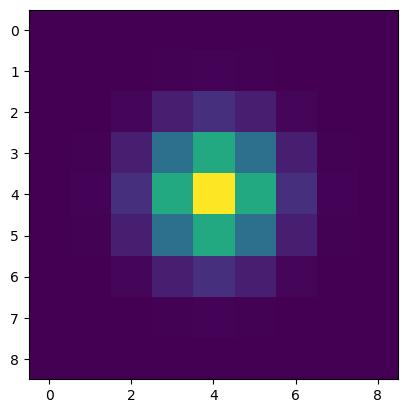

In [18]:
plt.imshow(tp.masks.gaussian_kernel(1, 4)[:, None] * tp.masks.gaussian_kernel(1, 4)[None, :])

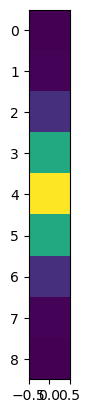

In [14]:
plt.imshow(tp.masks.gaussian_kernel(1, 4)[:, None])

In [10]:
print(len(my_df))
print(len(tp_df))

1151
1103


In [12]:

# my_tree.query_ball_tree(tp_tree, 0.05)

In [13]:
print((dists != np.inf).sum())
dists[dists != np.inf]
inds[dists != np.inf]
pass

948


In [15]:
it = enumerate(iter(coords(tp_df).T[dists == np.inf]))

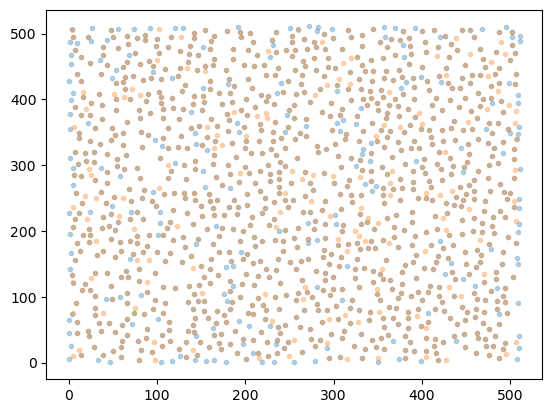

In [14]:
3//2

1

In [ ]:
tp_df

,y,x,mass
0,4.220573,74.692416,1054.478337
1,4.599053,270.108974,737.670025
2,4.623336,494.512906,1009.522685
3,5.025773,9.336279,922.702762
4,4.810352,121.785098,638.806371
...,...,...,...
1271,506.159615,181.958809,646.392449
1272,506.280800,214.909562,450.154686
1273,507.019594,339.288914,534.375697
1274,506.581047,381.735925,713.557145


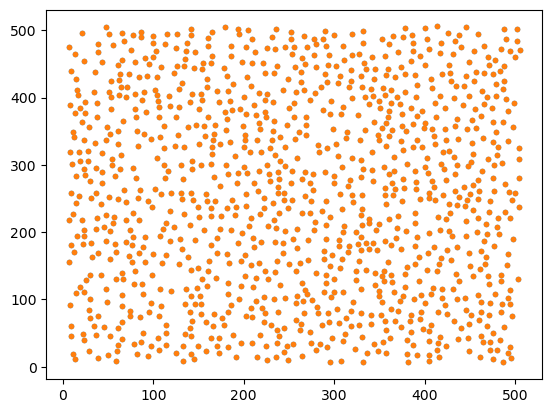

In [ ]:
plt.plot(*coords(my_df).T[inds[dists != np.inf]].T, ".", alpha = 1)
plt.plot(*coords(tp_df).T[dists != np.inf].T, ".", alpha = 1)